In [6]:
import pandas as pd
import numpy as np

customers = pd.read_csv('customer.csv')

In [7]:
customers.head()

,cust_id,visitfreq,visitstore,avgproduct,pctpaid,pctpromo,dollarspent,pctwknddrevenue,pctwkndcount
0,29568,308,8,14.009740,0.901689,0.221216,40.422403,0.396651,0.340909
1,29909,400,10,14.947500,0.887080,0.254816,34.107875,0.309145,0.280000
2,39774,278,3,11.593525,0.825846,0.422230,40.609856,0.220049,0.248201
3,39856,600,3,10.595000,0.897885,0.230729,17.708833,0.327015,0.306667
4,59984,367,8,9.438692,0.871152,0.281169,27.865341,0.096816,0.111717


In [4]:
customers.describe()

,cust_id,visitfreq,visitstore,avgproduct,pctpaid,pctpromo,dollarspent,pctwknddrevenue,pctwkndcount,visitfreq_log
count,7.920000e+03,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000
mean,5.026131e+07,357.394444,6.637753,10.862527,0.865025,0.302479,28.214563,0.312799,0.274951,5.835366
std,2.907775e+07,107.876869,4.781680,3.232131,0.040744,0.082461,11.317291,0.134925,0.087164,0.295767
min,2.956800e+04,44.000000,1.000000,2.556136,0.667962,0.101211,7.653194,0.000000,0.000000,3.784190
25%,2.500981e+07,286.000000,3.000000,8.599143,0.838495,0.242650,21.236777,0.227806,0.228655,5.655992
50%,5.038985e+07,336.000000,5.000000,10.464368,0.867334,0.294903,26.042760,0.294988,0.275233,5.817111
75%,7.573990e+07,413.000000,9.000000,12.634220,0.894405,0.354386,32.953028,0.380870,0.320144,6.023448
max,9.999978e+07,971.000000,76.000000,32.410138,0.968803,0.766922,320.073731,0.897820,0.746725,6.878326


In [13]:
# PLot a distribution and Q-Q plot to identify departures from normality

import matplotlib.pyplot as plt
from scipy.stats import skew, norm, probplot, boxcox
import seaborn as sns

def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()
    
QQ_plot(customers['visitfreq'], 'visitfreq')

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 2000x700 with 2 Axes>

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


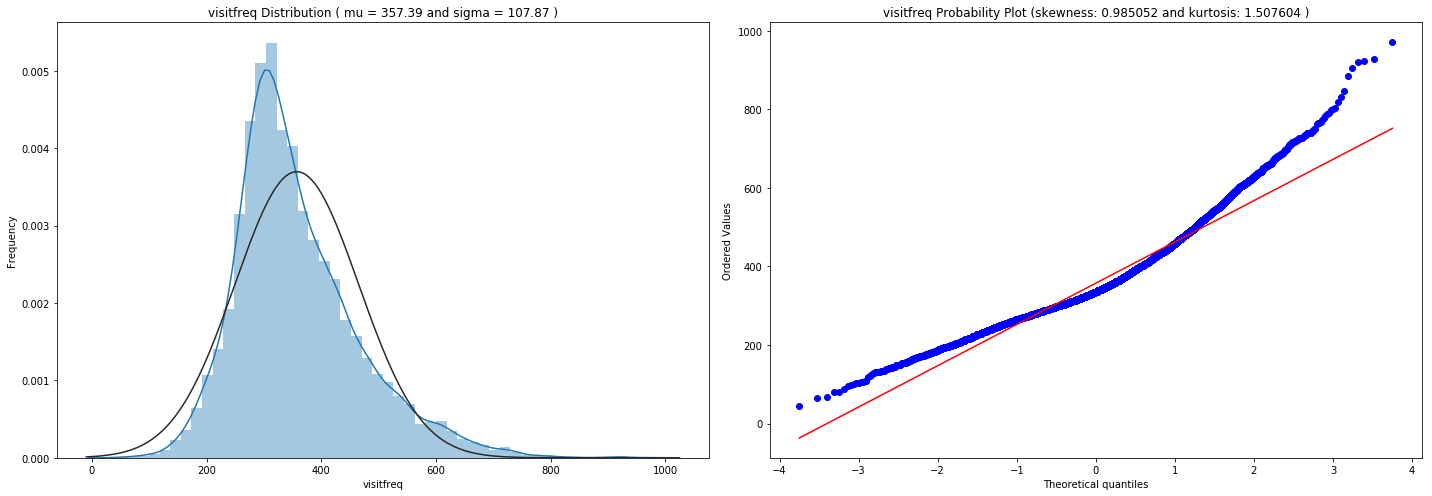

None


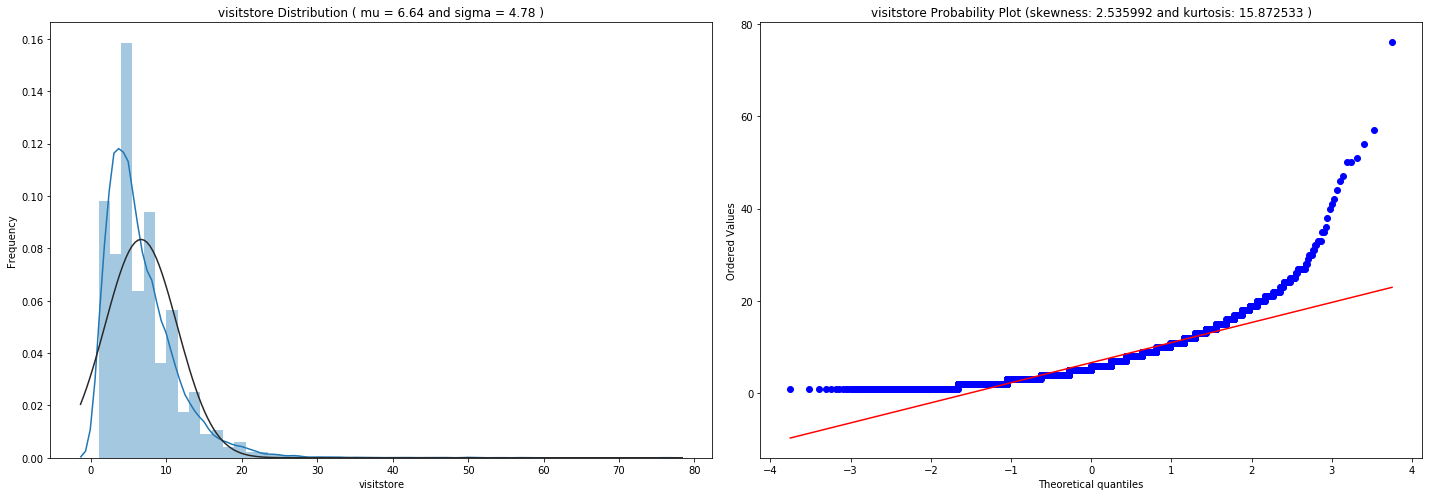

None


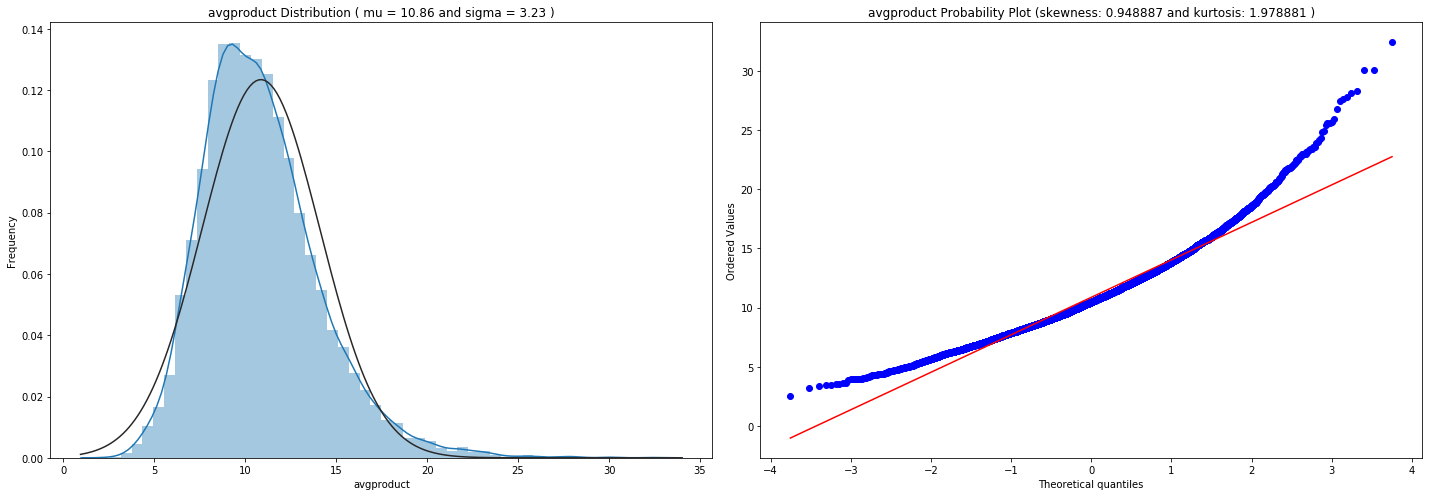

None


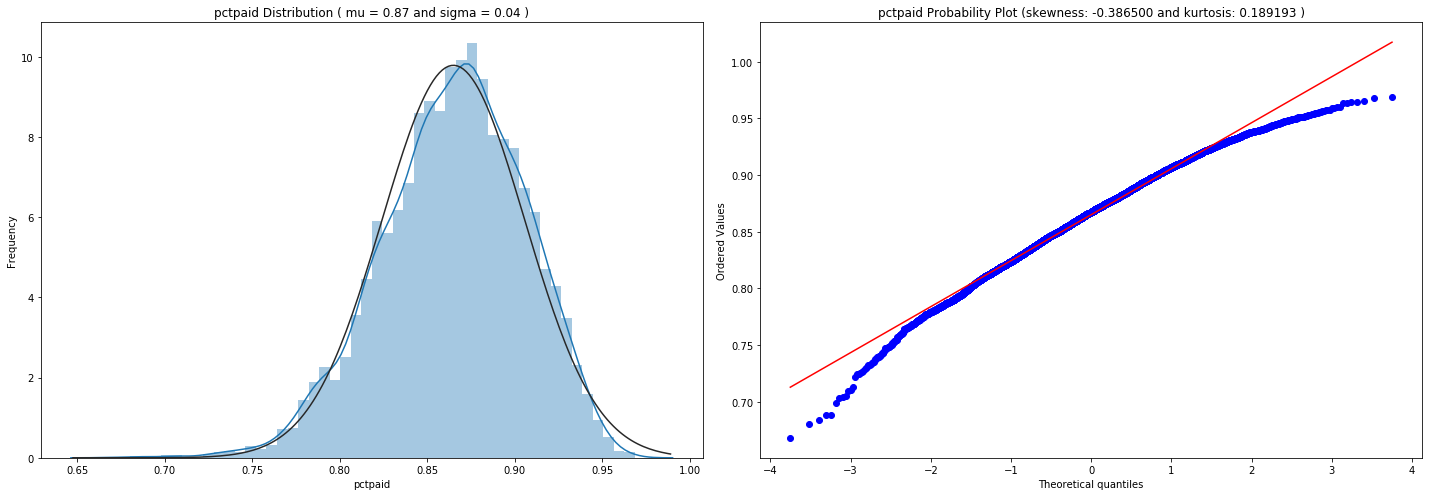

None


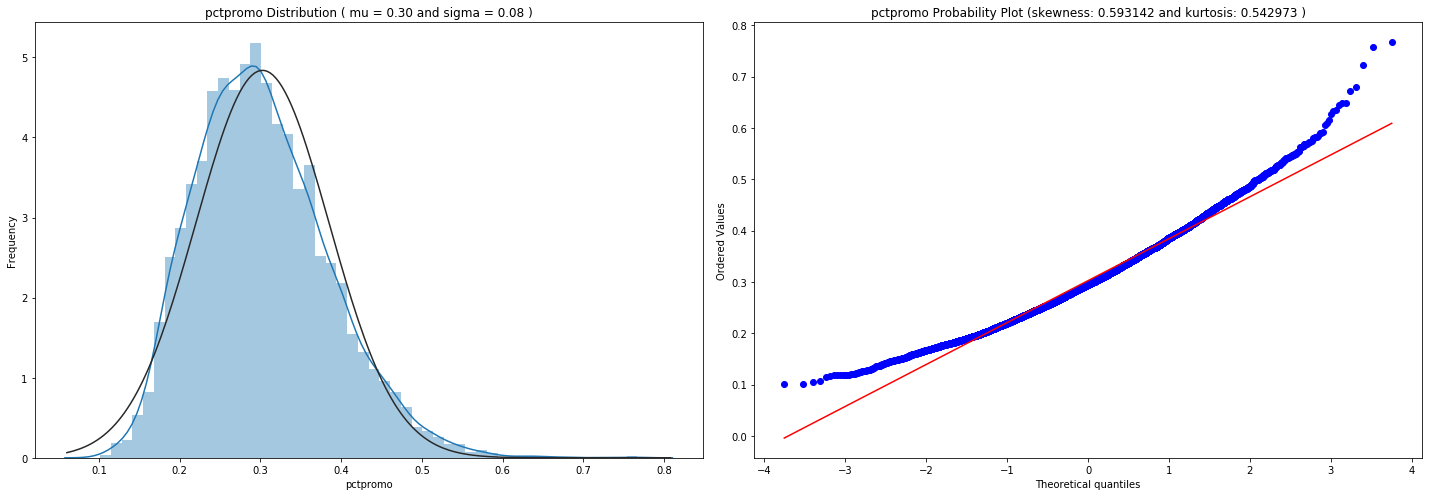

None


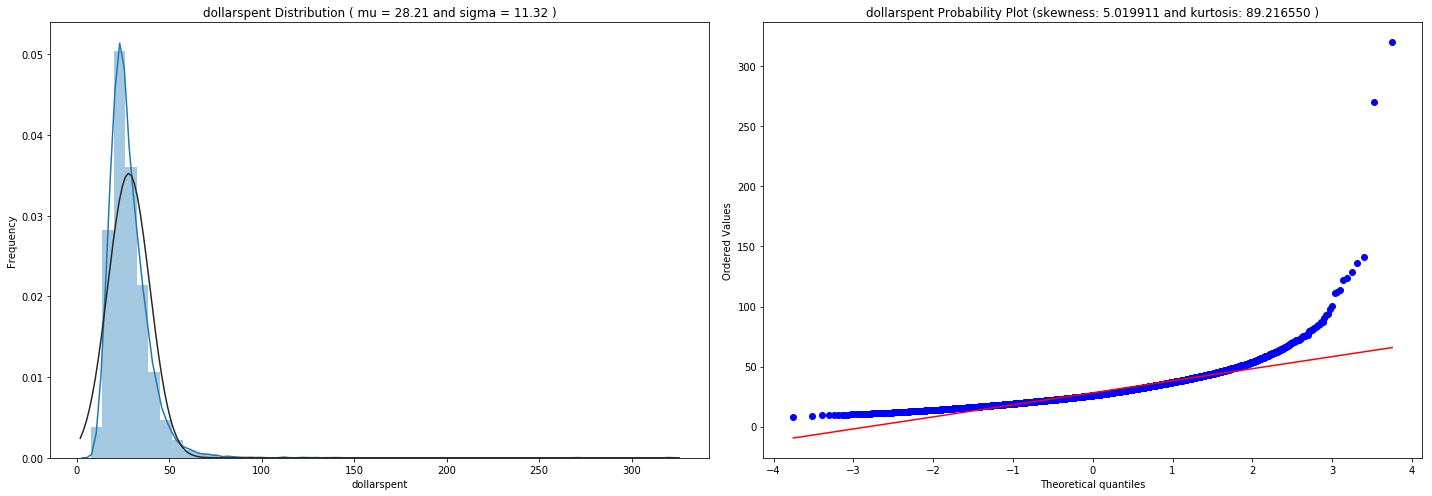

None


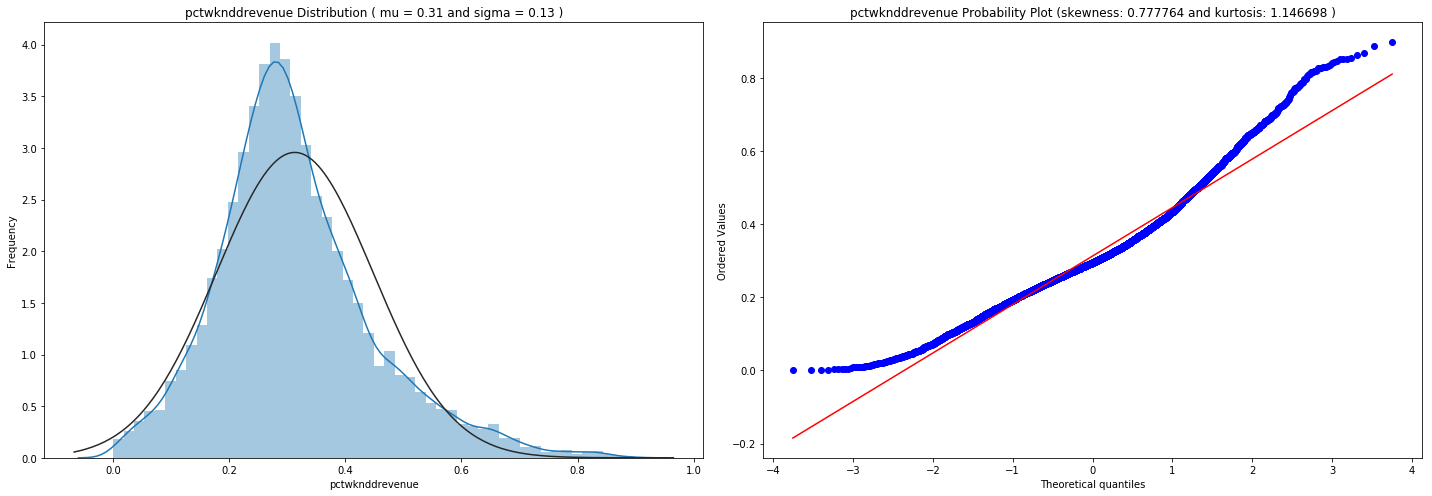

None


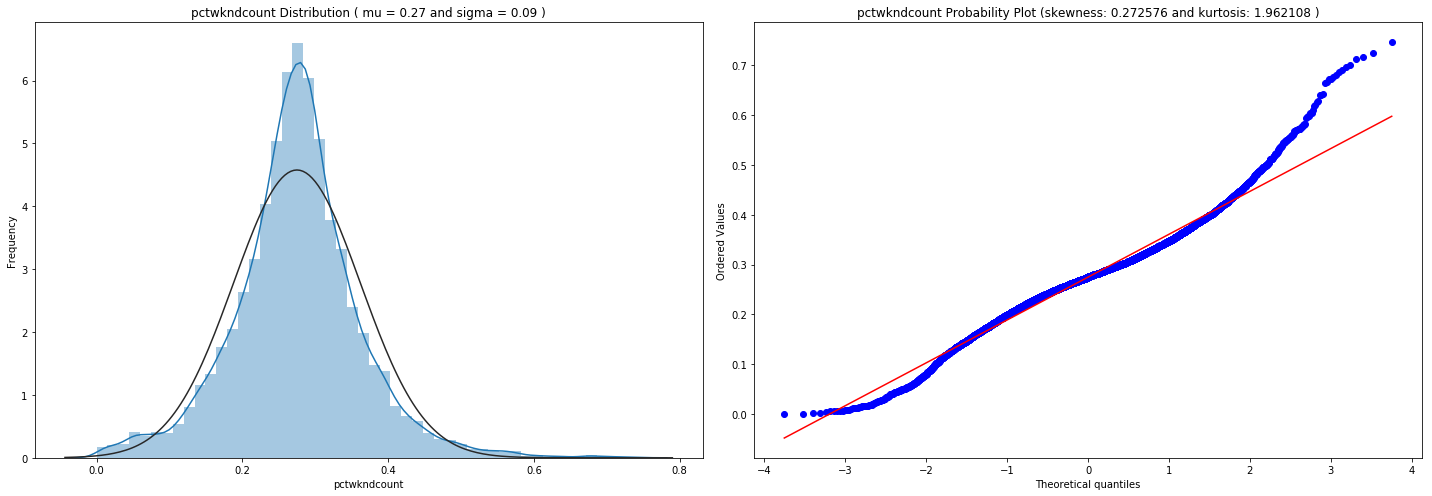

None


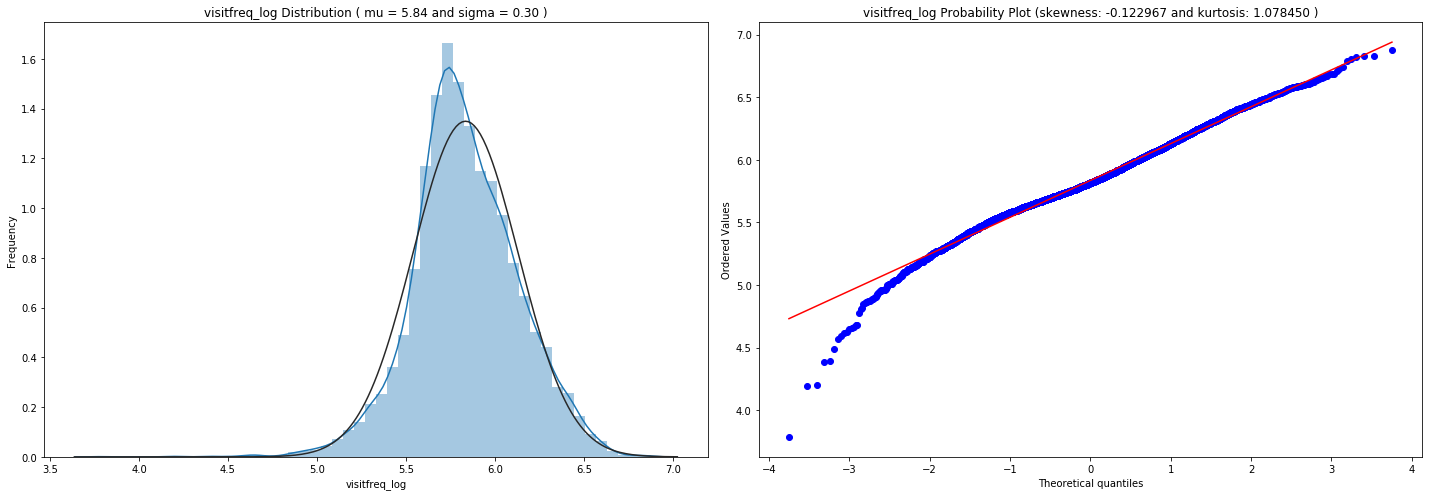

None


In [56]:
# Distribution for numerical variables

for i in range(1,10):
    print(QQ_plot(customers.iloc[:,i], customers.columns[i]))

In [9]:
# Data Preprocessing
# Normalization: based on the varaince and range of each feature
# take log transformation for features that have high variance and range, and normalization for features have low variance and range

import math 
from sklearn import preprocessing

customers['visitfreq_log'] = customers['visitfreq'].apply(math.log)

In [10]:
# Standardization
features = customers.columns.tolist()

# standarize all columns
features_std = [feature for feature in features if feature not in ['cust_id','visitfreq']]
scaler = preprocessing.StandardScaler().fit(customers[features_std])
customers_std = scaler.transform(customers[features_std])

In [11]:
customers_std

array([[ 0.28490685,  0.97378872,  0.89993542, ...,  0.62151154,
         0.75676123, -0.35593137],
       [ 0.70319627,  1.26394374,  0.54134   , ..., -0.02708132,
         0.05793092,  0.52780854],
       [-0.76081669,  0.22618046, -0.96164845, ..., -0.68746157,
        -0.30690458, -0.70243749],
       ...,
       [ 0.49405156, -1.17442828, -0.24428237, ...,  0.546556  ,
        -0.28626909,  0.01783847],
       [ 0.49405156,  0.22122206,  1.0214559 , ...,  0.36411656,
        -0.02811908,  0.52780854],
       [-1.17910611, -1.25886418,  0.64315468, ..., -1.17848515,
        -0.44482017,  0.51085988]])

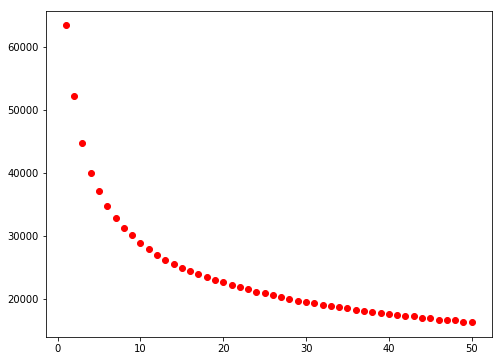

The best K sugest:  4


In [14]:
# Perform Kmeans clustering models

from sklearn.cluster import KMeans

cl = 50
# set threshold at 10%, if as k increases
corte = 0.1
# set a number for cost function
anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k, 
        # start with k-means++
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(customers_std)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_
 
    # Sum of distances of samples to their closest cluster center
    # Elbow method for selecting the optimal number of clusters
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): 
        K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

print('The best K sugest: ',K_best)

In [15]:
# use k=4 to run model again

model = KMeans(n_clusters=K_best, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=41)

model = model.fit(customers_std)

labels = model.labels_

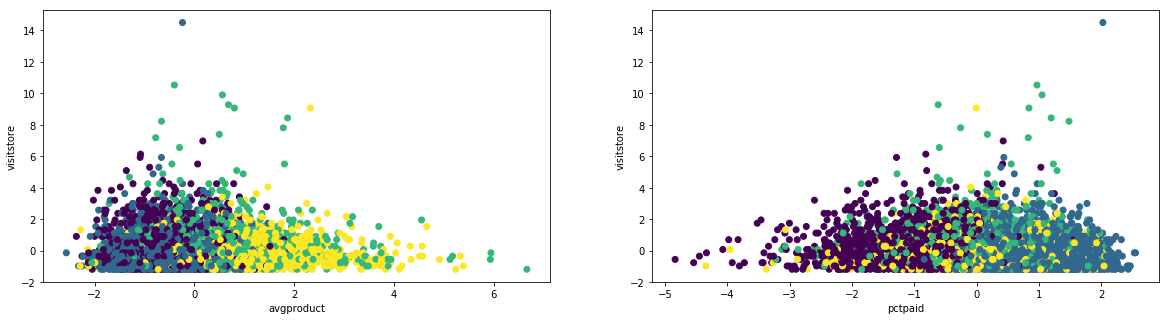

In [11]:
# And we'll visualize it:

#plt.scatter(X_scaled[:,0], X_scaled[:,1], c=model.labels_.astype(float))
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = customers_std[:,1], y = customers_std[:,0], c=model.labels_.astype(float))
ax.set_xlabel(features_std[1])
ax.set_ylabel(features_std[0])
ax = fig.add_subplot(122)
plt.scatter(x = customers_std[:,2], y = customers_std[:,0], c=model.labels_.astype(float))
ax.set_xlabel(features_std[2])
ax.set_ylabel(features_std[0])

plt.show()

In [12]:
# Calculate sihouette_score for performance evaluation when k =4

from sklearn.metrics import silhouette_samples, silhouette_score
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=41)

silhouette_score(X = customers_std, labels = model.fit_predict(customers_std))

0.18183942634473452

In [13]:
# Calculate sihouette_score for performance evaluation when k =3

model2 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=41)

silhouette_score(X = customers_std, labels = model2.fit_predict(customers_std))

0.17566378411184855

In [91]:
# Calculate sihouette_score for performance evaluation when k = 5

model3 = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=41)

silhouette_score(X = customers_std, labels = model3.fit_predict(customers_std))

0.18365204213411876

In [16]:
# check center point of 4 clusters

print("Centers of each cluster:")
cent_transformed = scaler.inverse_transform(model.cluster_centers_)
print(pd.DataFrame(np.exp(cent_transformed[:, -1:]),columns=['visitfreq']))
print('-'*50)
print(pd.DataFrame(cent_transformed[:, :-1], columns=['visitstore', 'avgproduct', 'pctpaid', 'pctpromo', 'dollarspent', 'pctwknddrevenue', 'pctwkndcount']))

Centers of each cluster:
    visitfreq
0  361.814998
1  404.826089
2  298.484580
3  258.801022
--------------------------------------------------
   visitstore  avgproduct   pctpaid  pctpromo  dollarspent  pctwknddrevenue  \
0    7.484775    9.330707  0.824403  0.389173    25.454594         0.266147   
1    5.822290    9.421513  0.895069  0.240605    21.986879         0.292150   
2    7.993649   12.718730  0.861887  0.308201    32.917660         0.508315   
3    5.783367   14.068427  0.865074  0.298869    39.867253         0.232480   

   pctwkndcount  
0      0.246314  
1      0.262179  
2      0.390029  
3      0.230532  


In [81]:
# check center point of 3 clusters
import numpy as np

print("Centers of each cluster:")
cent_transformed = scaler.inverse_transform(model2.cluster_centers_)
print(pd.DataFrame(np.exp(cent_transformed[:, -1:]),columns=['visitfreq']))
print('-'*50)
print(pd.DataFrame(cent_transformed[:, :-1], columns=['visitstore', 'avgproduct', 'pctpaid', 'pctpromo', 'dollarspent', 'pctwknddrevenue', 'pctwkndcount']))

Centers of each cluster:
    visitfreq
0  342.084209
1  394.834858
2  272.090465
--------------------------------------------------
   visitstore  avgproduct   pctpaid  pctpromo  dollarspent  pctwknddrevenue  \
0    7.203509   10.011960  0.828293  0.379207    27.722878         0.248290   
1    5.851167    9.663085  0.894391  0.242127    22.665264         0.292591   
2    7.194066   13.848257  0.863731  0.303594    37.732224         0.425702   

   pctwkndcount  
0      0.234716  
1      0.261789  
2      0.346267  


In [20]:
# Create a new column to assign labels

cust_table = pd.concat([pd.DataFrame(model.labels_)[0], customers], axis = 1, ignore_index = True)
cust_table.columns = ['labels', 'cust_id', 'visit_freq', 'visit_store', 'product_count', 'pct_promo_paid',
       'pct_promo_item', 'dollar_spent', 'pct_wknd_revenue', 'pct_wknd_count',
       'visitfreq_log']
cust_table.head()

,labels,cust_id,visit_freq,visit_store,product_count,pct_promo_paid,pct_promo_item,dollar_spent,pct_wknd_revenue,pct_wknd_count,visitfreq_log
0,2,29568,308,8,14.009740,0.901689,0.221216,40.422403,0.396651,0.340909,5.730100
1,3,29909,400,10,14.947500,0.887080,0.254816,34.107875,0.309145,0.280000,5.991465
2,3,39774,278,3,11.593525,0.825846,0.422230,40.609856,0.220049,0.248201,5.627621
3,1,39856,600,3,10.595000,0.897885,0.230729,17.708833,0.327015,0.306667,6.396930
4,1,59984,367,8,9.438692,0.871152,0.281169,27.865341,0.096816,0.111717,5.905362


In [65]:
# Create a new column for revenue

cust_table["revenue"] = cust_table["pctpaid"]*cust_table["dollarspent"]

In [27]:
customers.describe()

,cust_id,visitfreq,visitstore,avgproduct,pctpaid,pctpromo,dollarspent,pctwknddrevenue,pctwkndcount,visitfreq_log
count,7.920000e+03,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000
mean,5.026131e+07,357.394444,6.637753,10.862527,0.865025,0.302479,28.214563,0.312799,0.274951,5.835366
std,2.907775e+07,107.876869,4.781680,3.232131,0.040744,0.082461,11.317291,0.134925,0.087164,0.295767
min,2.956800e+04,44.000000,1.000000,2.556136,0.667962,0.101211,7.653194,0.000000,0.000000,3.784190
25%,2.500981e+07,286.000000,3.000000,8.599143,0.838495,0.242650,21.236777,0.227806,0.228655,5.655992
50%,5.038985e+07,336.000000,5.000000,10.464368,0.867334,0.294903,26.042760,0.294988,0.275233,5.817111
75%,7.573990e+07,413.000000,9.000000,12.634220,0.894405,0.354386,32.953028,0.380870,0.320144,6.023448
max,9.999978e+07,971.000000,76.000000,32.410138,0.968803,0.766922,320.073731,0.897820,0.746725,6.878326


# Boxplot

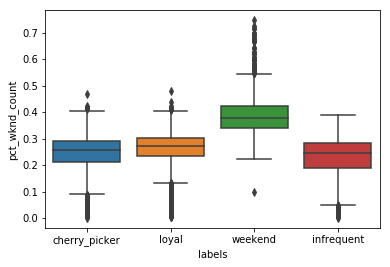

None


In [22]:
sns.boxplot(x="labels", y=cust_table.columns[i], data=cust_table)
plt.xticks([0, 1, 2,3], ['cherry_picker', 'loyal', 'weekend','infrequent'])
print(plt.show())

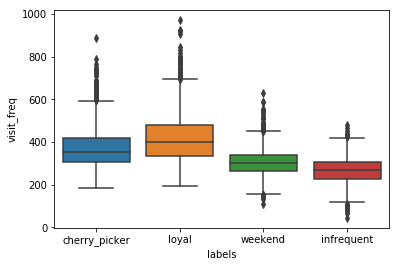

None


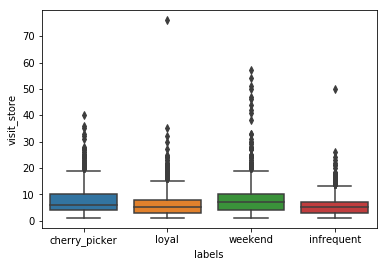

None


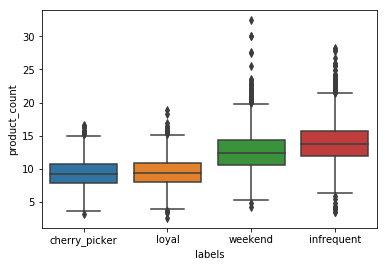

None


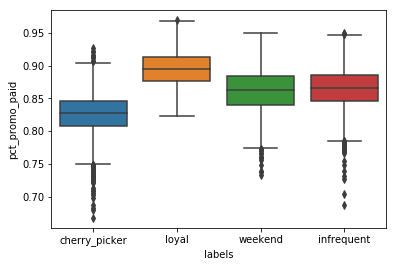

None


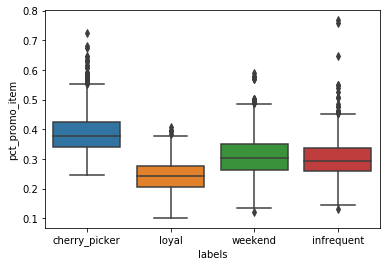

None


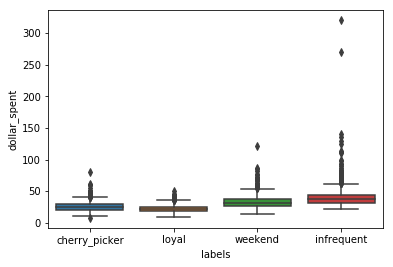

None


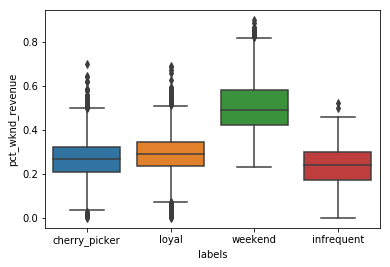

None


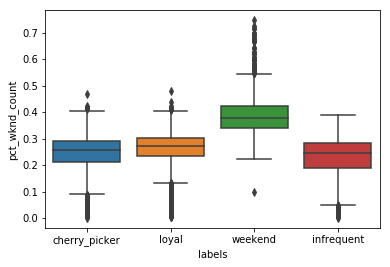

None


In [23]:
# Boxplots showing distribution of each variable in different clusters
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


for i in range(2,10):
    sns.boxplot(x="labels", y=cust_table.columns[i], data=cust_table)
    plt.xticks([0, 1, 2, 3], ['cherry_picker', 'loyal', 'weekend','infrequent'])
    print(plt.show())